In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

## Хід роботи

In [30]:
NUM_OF_PERIODS_FOR_ANALOGUE = 11
NUM_OF_PERIODS_FOR_SAMPLING = 5
NUM_OF_DOTS_PER_PERIOD_RESTORED = 5
F_S = 100
F_CONST = F_S/8
T_S = 1/F_S
def function(t,f):
    return np.sin(t*f*2*np.pi) #+ np.cos(t*np.pi*2*f/2) + np.cos(t*np.pi*2*f/3)

FUNCTION =np.vectorize(function)

### 1. Сформувати послідовність довжиною 64 відліків сінусоїди, частота якої дорівнює частоті 20-го біна 64-точечного ДПФ. Обчислити 64-точечне ДПФ. Побудувати графік амплітудного спектру.

In [31]:
def DFT(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [32]:
#yf = fft(data_Y)
sequence_size = 64
xf = fftfreq(sequence_size, 1 / F_S)
index = 20
bin_20_freq_scipy = xf[index]
bin_20_freq_own = index / sequence_size * F_S

print(f'bin_20_freq_scipy_computed: {bin_20_freq_scipy}. bin_20_freq_own_computed: {bin_20_freq_own}. F_sampling: {F_S}.')

bin_20_freq_scipy_computed: 31.25. bin_20_freq_own_computed: 31.25. F_sampling: 100.


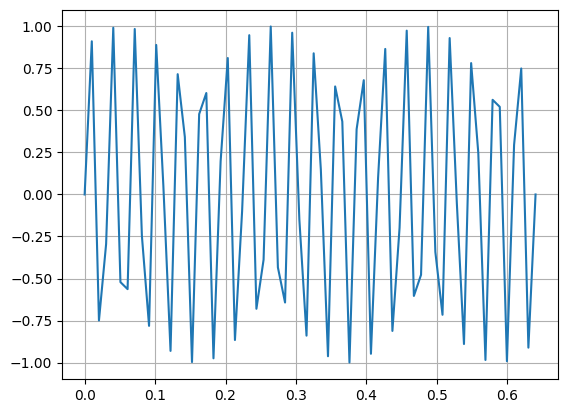

In [33]:
X = np.linspace(0,T_S*sequence_size,sequence_size)
Y = FUNCTION(X,bin_20_freq_own)
plt.plot(X,Y)
plt.grid()

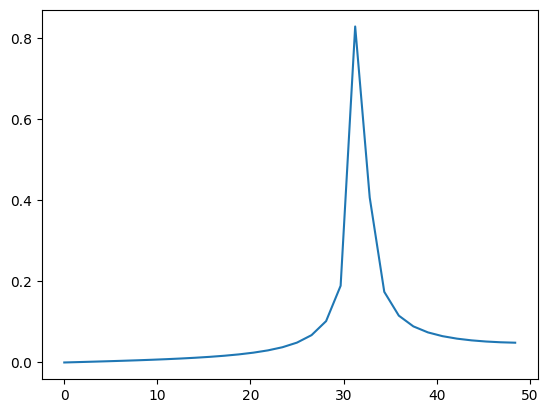

In [34]:
yf = fft(Y)
positive_xf = xf[:sequence_size//2]
positive_normalized_yf = 2/sequence_size*np.abs(yf[0:sequence_size//2])
plt.plot(positive_xf,positive_normalized_yf)

In [35]:
len(yf_own)

64

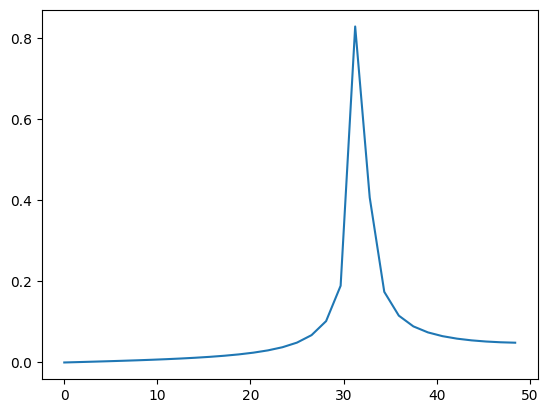

In [36]:
yf_own = DFT(Y)
positive_normalized_yf_own = 2/sequence_size*np.abs(yf_own[0:sequence_size//2])
plt.plot(positive_xf,positive_normalized_yf_own)

In [37]:
index_max = np.argmax(positive_normalized_yf)
print(f'Frequency found: {positive_xf[index_max]}, Frequency magnitude (normalized): {positive_normalized_yf[index_max]}')

Frequency found: 31.25, Frequency magnitude (normalized): 0.8280071636673368


## 2. Доповнити послідовність нульовими відліками до довжини 256 відліків. Обчислити 256-точече ДПФ. Побудувати графік амплітудного спектру. Порівняти його з графіком 64- точечного спектру.

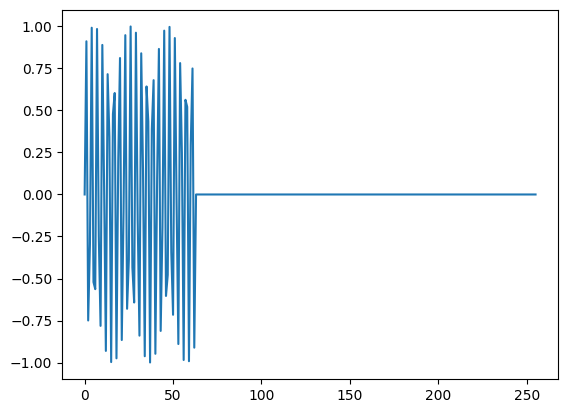

In [38]:
new_seq_size = 256
Y_expanded = np.pad(Y,[(0,new_seq_size-sequence_size),])
yf_expanded = fft(Y_expanded)
xf_256 = fftfreq(new_seq_size,1/F_S)
plt.plot(Y_expanded)

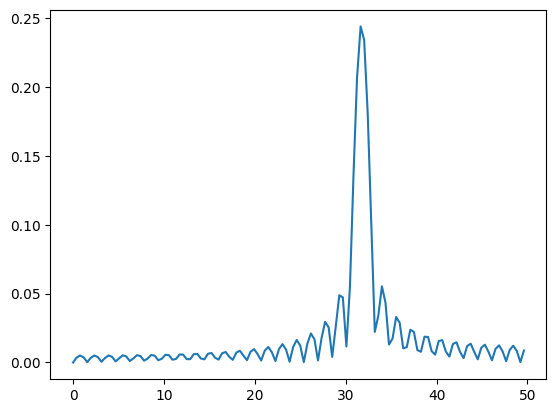

In [39]:
positive_xf_expanded = xf_256[:new_seq_size//2]
positive_normalized_yf_expanded = 2/new_seq_size*np.abs(yf_expanded[0:new_seq_size//2])

plt.plot(positive_xf_expanded,positive_normalized_yf_expanded)

### 3. Повторити пп 1, 2 для синусоїди, частота якої відповідає 20.5 біна.

In [40]:
xf = fftfreq(sequence_size, 1 / F_S)
index = 20.5
bin_20_5_freq_own = index / sequence_size * F_S
print(f'bin_20.5_freq_own_computed: {bin_20_5_freq_own}. F_sampling: {F_S}.')

bin_20.5_freq_own_computed: 32.03125. F_sampling: 100.


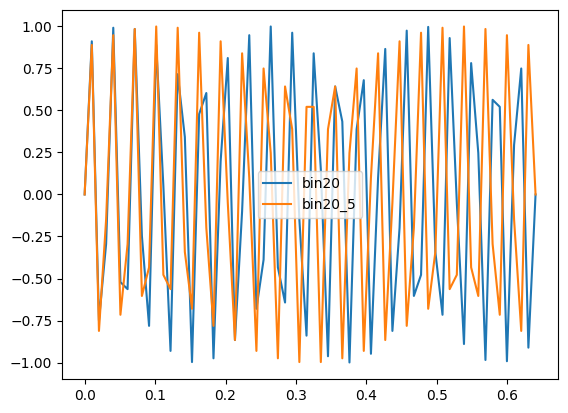

In [41]:
X = np.linspace(0,T_S*sequence_size,sequence_size)
fig,ax = plt.subplots()
Y_20_5 = FUNCTION(X,bin_20_5_freq_own)
ax.plot(X,Y,label='bin20')
ax.plot(X,Y_20_5,label='bin20_5')
ax.legend()

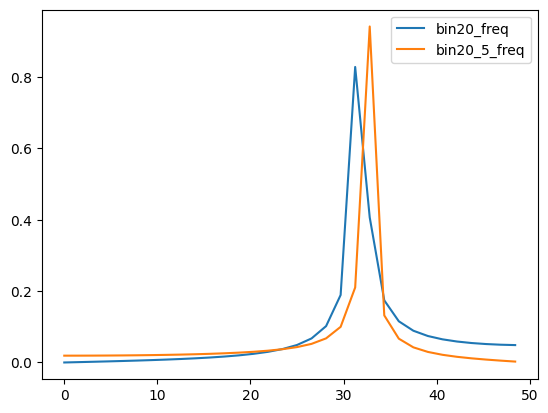

In [42]:
yf_20_5 = fft(Y_20_5)
positive_xf = xf[:sequence_size//2]
positive_normalized_yf_20 = 2/sequence_size*np.abs(yf[0:sequence_size//2])
positive_normalized_yf_20_5 = 2/sequence_size*np.abs(yf_20_5[0:sequence_size//2])
fig,ax = plt.subplots()
ax.plot(positive_xf,positive_normalized_yf_20,label='bin20_freq')
ax.plot(positive_xf,positive_normalized_yf_20_5,label='bin20_5_freq')
ax.legend()

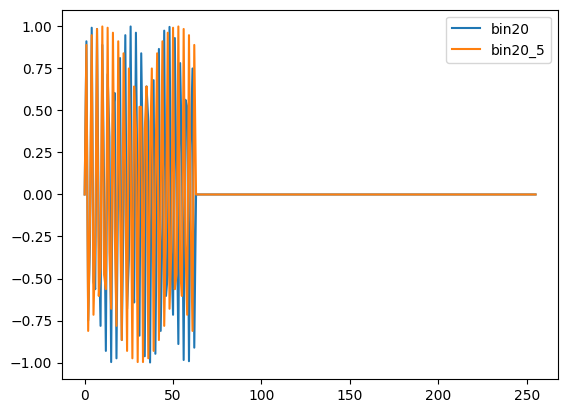

In [43]:
Y_expanded_20_5 = np.pad(Y_20_5,[(0,new_seq_size-sequence_size),])
yf_expanded_20_5 = fft(Y_expanded_20_5)
xf_256 = fftfreq(new_seq_size,1/F_S)
fig,ax = plt.subplots()
ax.plot(Y_expanded,label='bin20')
ax.plot(Y_expanded_20_5,label='bin20_5')
ax.legend()

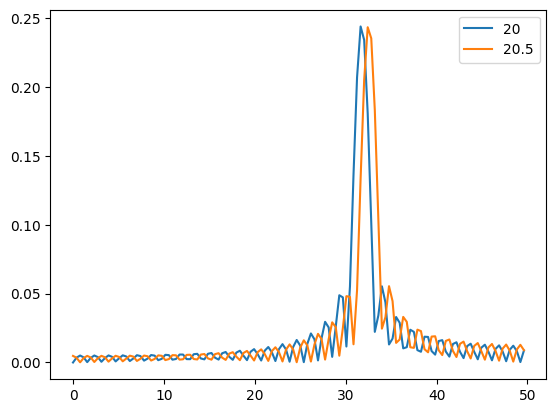

In [44]:
positive_normalized_yf_expanded_20_5 = 2/new_seq_size*np.abs(yf_expanded_20_5[0:new_seq_size//2])
fig,ax = plt.subplots()
ax.plot(positive_xf_expanded,positive_normalized_yf_expanded,label='20')
ax.plot(positive_xf_expanded,positive_normalized_yf_expanded_20_5,label='20.5')
ax.legend()

### 4.  Сформувати послідовність довжиною 64 відліка цифрової синусоїди, частота якої дорівнює частоті 20-го біна 64-точечного ДПФ. Обчислити 64-точечне ДПФ.

### 5. Доповнити спектр нулями до довжини 256 відліків і обчислити зворотне ДПФ. Порівняти результат з початковою послідовністю.

### 6. Повторити пп 4-5 для прямокутного і трикутного імпульсів довжиною 30 відліків.

In [45]:
from scipy.signal import square,sawtooth
from scipy.fft import ifft

def create_sine_normal_function(t,f):
    return np.sin(t*f*2*np.pi) #+ np.cos(t*np.pi*2*f/2) + np.cos(t*np.pi*2*f/3)

def create_sine_square_function(t,f):
    return square(2 * np.pi * f * t)

def create_sine_triangle_function(t,f):
    return sawtooth(2* np.pi * f * t)


sine_normal_function = np.vectorize(create_sine_normal_function)
sine_square_function = np.vectorize(create_sine_square_function)
sine_triangle_function = np.vectorize(create_sine_triangle_function)


def create_seqs(function,seq_size,bin_index):
    #bin_20_freq_scipy = xf[index]
    bin_20_freq_own = bin_index / seq_size * F_S
    #print(f'bin_20_freq_scipy_computed: {bin_20_freq_scipy}. bin_20_freq_own_computed: {bin_20_freq_own}. F_sampling: {F_S}.')
    Xvals = np.linspace(0,T_S*seq_size,seq_size)
    Yvals = function(X,bin_20_freq_own)
    return Xvals,Yvals
    
def compute_fft(Yvals,seq_size):
    xf = fftfreq(seq_size, 1 / F_S)
    yf = fft(Yvals)
    return xf,yf

def expand_spectre(yF,expanded_seq_size,seq_size):
    expanded_difference = (expanded_seq_size - seq_size)
    yF_expanded = np.pad(yF,[(0,expanded_difference)],constant_values=1)
    xF_expanded = fftfreq(expanded_seq_size, 1 / F_S)
    return xF_expanded, yF_expanded
    
def compute_back_fft(expanded_spectre,expanded_seq_size):
    seq_from_expanded_Yf = ifft(expanded_spectre)
    Xvals_expanded = np.linspace(0,T_S*expanded_seq_size,expanded_seq_size)
    return Xvals_expanded,seq_from_expanded_Yf

def full_process_4_5_6(expanded_seq_size,ax_row,seq_size,function,bin_index):
    Xvals,Yvals = create_seqs(function=function,seq_size=seq_size,bin_index=bin_index)
    xf,yf = compute_fft(Yvals=Yvals,seq_size=seq_size)
    XF_expanded,yF_expanded = expand_spectre(yF=yf,expanded_seq_size=expanded_seq_size,seq_size=seq_size)
    Xvals_expanded,Y_vals_restored = compute_back_fft(expanded_spectre=yF_expanded,expanded_seq_size=expanded_seq_size)
    ax_original_signal = ax_row[0]
    ax_original_spectre = ax_row[2]
    ax_restored_signal = ax_row[1]

    ax_original_signal.plot(Xvals,Yvals,label='original signal')
    ax_original_signal.plot(Xvals,Y_vals_restored[:seq_size],label ='restored signal')
    ax_original_signal.legend()


    ax_restored_signal.plot(Xvals_expanded,Y_vals_restored,label='restored signal')
    ax_restored_signal.legend()

    ax_original_spectre.plot(xf,np.abs(yf),label='orginal spectre')
    ax_original_spectre.plot(XF_expanded,np.abs(yF_expanded),label='expanded spectre')
    ax_original_spectre.legend()

#### sine normal vave

c:\Users\vladp\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


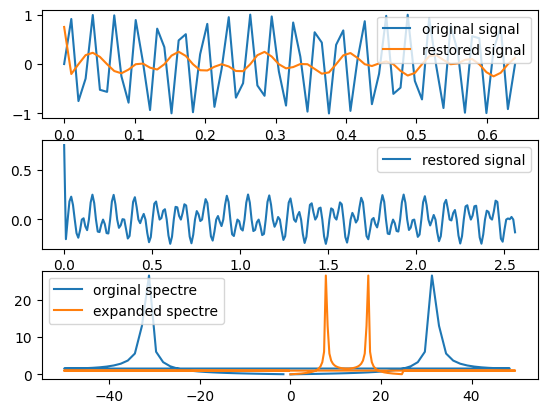

In [46]:
fig,ax = plt.subplots(3)
full_process_4_5_6(expanded_seq_size=256,ax_row=ax,seq_size=64,function=sine_normal_function,bin_index=20)

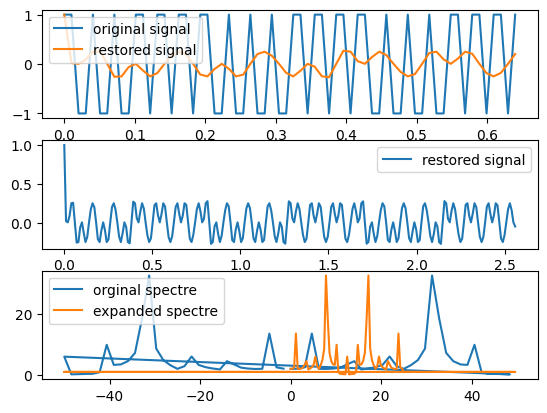

In [47]:
fig,ax = plt.subplots(3)
full_process_4_5_6(expanded_seq_size=256,ax_row=ax,seq_size=64,function=sine_square_function,bin_index=20)

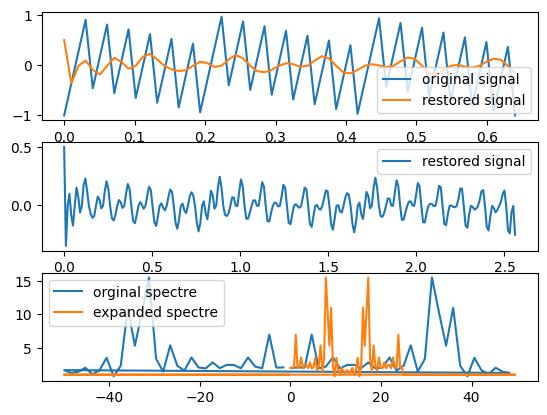

In [48]:
fig,ax = plt.subplots(3)
full_process_4_5_6(expanded_seq_size=256,ax_row=ax,seq_size=64,function=sine_triangle_function,bin_index=20)

### 7. Сформувати послідовність довжиною 64 відліки цифрової  сінусоїди, частота якої дорівнює частоті 20-го біна 64-точечного ДПФ. Перетворити цю послідовність в комплексну послідовність половинної довжини. Обчислити ДПФ і відновити спектр початкової  дійсної послідовності. Порівняти результат з результатом прямого обчислення 64-точечного ДПФ дійсної послідовності.

In [137]:
x_seq,y_seq = create_seqs(function=sine_normal_function,seq_size=64,bin_index=20)
arr = [complex(y_seq[ind*2],y_seq[ind*2+1]) for ind in range(len(y_seq)//2)]
xf = fftfreq(32, 1 / F_S)
yf = fft(arr)
xf = fftfreq(64,1/F_S)

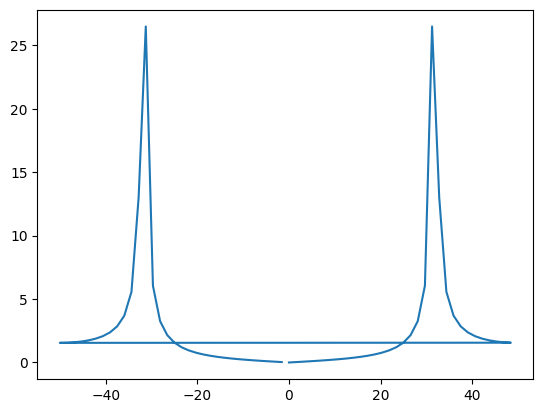

In [138]:

plt.plot(xf,abs(fft(y_seq)))


In [146]:
yf_edited = 1/2*(yf+yf[::-1]) +1/(2j)*(yf-yf[::-1])*np.exp(complex(0,-2*np.pi/32))

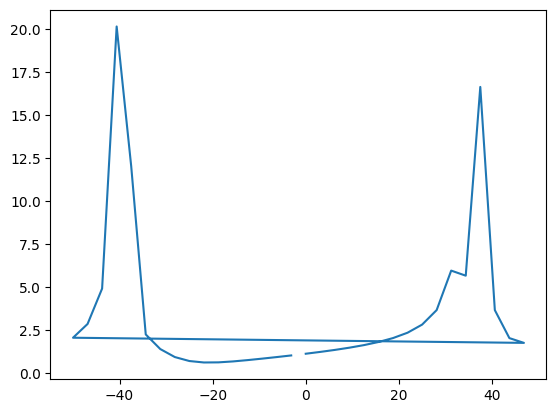

In [147]:
xf = fftfreq(32, 1 / F_S)
plt.plot(xf,abs(yf_edited))

### 8. Сформувати дві дійсні послідовності однакової довжини і обчислити їх ДПФ.

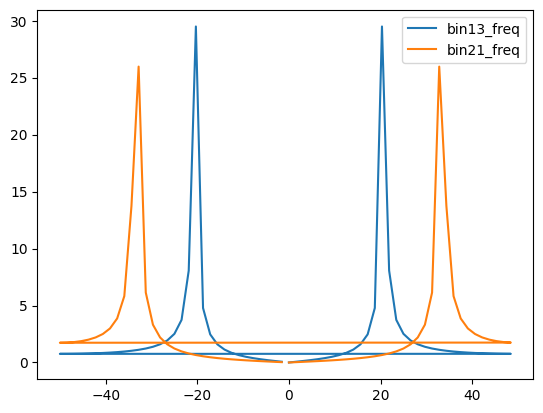

In [145]:
x_seq_0,y_seq_0 = create_seqs(function=sine_normal_function,seq_size=64,bin_index=13)
x_seq_1,y_seq_1 = create_seqs(function=sine_normal_function,seq_size=64,bin_index=21)
yf_0 = fft(y_seq_0)
yf_1 = fft(y_seq_1)
xf = fftfreq(64,1/F_S)
fig,ax = plt.subplots()
ax.plot(xf,abs(yf_0),label ='bin13_freq')
ax.plot(xf,abs(yf_1),label ='bin21_freq')
ax.legend()


### 9. Сформувати з двох дійсних послідовностей (п.8) комплексну послідовність такої ж довжини. Обчислити ДПФ комплексної послідовності і відновити спектри дійсних послідовностей. Порівняти результати з результатами, отриманими в п.8. 

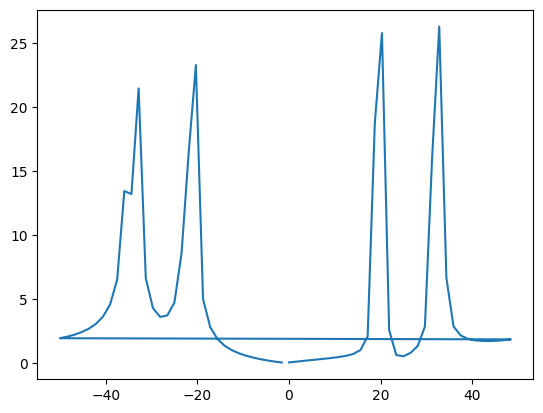

In [149]:
y_new = y_seq_0 + y_seq_1*1j
xf = fftfreq(64,1/F_S)
yf_new = fft(y_new)
yf_new = 1/2*(yf_new+yf_new[::-1]) +1/(2j)*(yf_new-yf_new[::-1])*np.exp(complex(0,-2*np.pi/64))
plt.plot(xf,abs(yf_new))

### 10. Обчислити 5 відліків спектру (біни 18, 19, 20, 21, 22) послідовності з п.1, використовуючи алгоритм Герцеля і порівняти результат з результатом обчислення ДПФ.

In [154]:
x_seq,y_seq = create_seqs(function=sine_normal_function,seq_size=64,bin_index=20)

In [155]:
def goertzel(x, k, N):
    w = 2*np.pi*k/N
    cw = np.cos(w)
    c = 2 *cw;
    sw = np.sin(w)
    z1 = 0 
    z2 = 0
    for n in range(1,N):
        z0 = x[n]+c*z1-z2
        z2 = z1
        z1 = z0
    return cw*z1-z2+(sw*z1)*1j

results = []
bins = [18,19,20,21,22]
for bin in bins:
    results.append(goertzel(y_seq,bin,64))

In [156]:
y_f = fft(y_seq)


In [157]:
xf

array([  0.    ,   1.5625,   3.125 ,   4.6875,   6.25  ,   7.8125,
         9.375 ,  10.9375,  12.5   ,  14.0625,  15.625 ,  17.1875,
        18.75  ,  20.3125,  21.875 ,  23.4375,  25.    ,  26.5625,
        28.125 ,  29.6875,  31.25  ,  32.8125,  34.375 ,  35.9375,
        37.5   ,  39.0625,  40.625 ,  42.1875,  43.75  ,  45.3125,
        46.875 ,  48.4375, -50.    , -48.4375, -46.875 , -45.3125,
       -43.75  , -42.1875, -40.625 , -39.0625, -37.5   , -35.9375,
       -34.375 , -32.8125, -31.25  , -29.6875, -28.125 , -26.5625,
       -25.    , -23.4375, -21.875 , -20.3125, -18.75  , -17.1875,
       -15.625 , -14.0625, -12.5   , -10.9375,  -9.375 ,  -7.8125,
        -6.25  ,  -4.6875,  -3.125 ,  -1.5625])

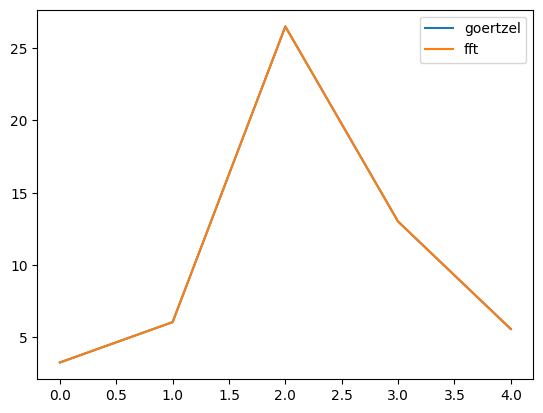

In [161]:
fig,ax = plt.subplots()
ax.plot(abs(np.array(results)),label ='goertzel')
ax.plot(abs(y_f[18:23]),label ='fft')
ax.legend()